In [ ]:
# Imports
from gekko import GEKKO
from matplotlib import pyplot as plt
import numpy as np

apm 142.197.172.106_gk_model99 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            6
   Intermediates:            0
   Connections  :            0
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           1090
 Number of total equations: -          990
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

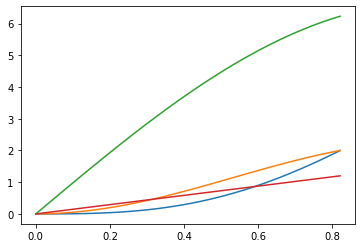

In [122]:
# Setup GEKKO
m = GEKKO()

# Setup time
nt = 100
m.time = np.linspace(0, 1, nt)

# Final value selector
fv = np.zeros(nt)
fv[-1] = 1
fv = m.Param(fv)

# Final time
tf = m.FV(1, lb=0.1)
tf.STATUS = 1

# State variables
x = m.Var(0)
y = m.Var(0)
v = m.Var(0)

# Control variable
u = m.MV(0, lb=-np.pi/2, ub=np.pi/2)
u.STATUS = 1

# Differential equations
m.Equation(x.dt() == tf*v*m.sin(u))
m.Equation(y.dt() == tf*v*m.cos(u))
m.Equation(v.dt() == tf*9.81*m.cos(u))

# Objective
m.Obj(tf + 1e6*(fv*x - 2)**2 + 1e6*(fv*y - 2)**2)

# Solve problem
m.options.IMODE = 6
m.options.MV_TYPE = 1
m.solve(disp=True)

# Plot
t = np.linspace(0, tf.value[0], nt)
plt.plot(t, x.value)
plt.plot(t, y.value)
plt.plot(t, v.value)
plt.plot(t, u.value)